# Homework 2 Programming Problem 8 (30 points)

## Problem Description

In this problem you will use linear least squares to fit a linear function to a 3D temperature field, with x,y,z locations and an associated temperature T.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

Results:
- Predicted temperature `T(5,5,5)` using a hand-coded LLS squares model with a linear function
- Direction of travel from `(5,5,5)` to experience the greatest decrease in temperature

Discussion:
- Reasoning for how we can use our fitted function to determine the direction of greatest decrease in temperature

#### Imports and Utility Functions:

In [32]:
import numpy as np
import matplotlib.pyplot as plt

## Load the data

The data is contained in `tempfield.npy` and can be loaded with `np.load(tempfield.npy)`. The first three columns correspond to the `x`, `y`, and `z` locations of the data points, and the 4th column corresponds to the temperature `T` at the respective point. Store the data as you see fit.

In [33]:
# YORU CODE GOES HERE
data = np.load("tempfield.npy")

x = data[:,0]
y = data[:,1]
z = data[:,2]

## LLS Regression in 3D

Now fit a linear function to the data using the closed for of LLS regression. Use your fitted function to report the predicted temperature at `x = 5, y = 5, z = 5`. You are free to add regularization to your model, but this is not required and will not be graded.

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_data_with_regression(data, z_data, regfun=None):
    plt.figure(figsize=(8,8))
    fig = plt.gcf()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1],0*z_data,s=13,c=z_data,zorder=-1,cmap="coolwarm", alpha=1, edgecolor="black", linewidth=0.2)
    ax.scatter(data[:,0], data[:,1],z_data,s=20,c="black",zorder=-1)
    for i in range(len(z_data)):
        ax.plot([data[i,0],data[i,0]],[data[i,1],data[i,1]],[0,z_data[i]],'k:',linewidth=0.3)

    ax.set_xlabel('\n' + r"$x$")
    ax.set_ylabel('\n' + r"$y$")
    ax.set_zlabel('\n'+r"$z$")
    ax.set_zlim(0,10)

    if regfun is not None:
        assert callable(regfun)
        vals = np.linspace(0, 1, 100)
        x1grid, x2grid = np.meshgrid(vals, vals)
        x1grid = x1grid * (np.max(data[:,0]) - np.min(data[:,0])) + np.min(data[:,0])
        x2grid = x2grid * (np.max(data[:,1]) - np.min(data[:,1])) + np.min(data[:,1])
        y = regfun(np.concatenate((x1grid.reshape(-1,1),x2grid.reshape(-1,1)),1)).reshape(*np.shape(x1grid))
        ax.plot_surface(x1grid, x2grid, y.reshape(x1grid.shape), alpha = 0.8, cmap = cm.coolwarm)
        plt.show()


In [40]:
# YOUR CODE GOES HERE
def get_linear_design_matrix(x):
    x1 = x[:,0].reshape(-1, 1)
    x2 = x[:,1].reshape(-1, 1)
    columns = [x1, x2, np.ones_like(x1)]   # Linear design matrix has a column of x1, column of x2, and a column of ones
    X = np.concatenate(columns, axis=1)   # Combine each column horizontally to make a matrix
    return X

In [41]:
x = np.column_stack((x,y))
X = get_linear_design_matrix(x)
w1 = np.linalg.inv(X.T @ X) @ X.T @ z.reshape(-1,1)

In [53]:
w1[1][0]

0.03029414320472714

In [42]:
def do_2d_linear_regression(x):
    z_fit = get_linear_design_matrix(x) @ w1
    return z_fit

In [54]:
# The temperature at (x,y,z) = (5, 5, 5) is 
print("The temperature at (x,y,z) = (5, 5, 5) is ", do_2d_linear_regression(np.array([[5,5]]))[0][0])

# The gradient at (5,5,5) is 
print("The gradient at (5,5,5) is ", np.array([w1[0][0], w1[1][0], 1]))

The temperature at (x,y,z) = (5, 5, 5) is  3.6150938477580796
The gradient at (5,5,5) is  [0.14104319 0.03029414 1.        ]


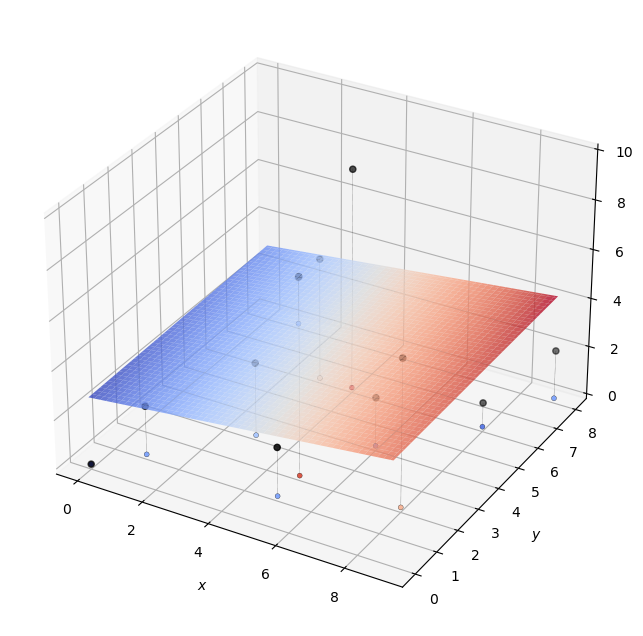

In [46]:
plot_data_with_regression(x, z, do_2d_linear_regression)

## Gradient Intuition

Using the function you fit in the previous part, in which direction should one move from the point `p = (5,5,5)` to experience the largest decrease in temperature in the immediate neighborhood of the point? Report the specific direction, along with your reasoning.

As above mention, the graient at (5,5,5) is [0.14104319, 0.03029414, 1], so the direction of greatest decrease in temperature is [-0.14104319, -0.03029414, -1]. The reason is that  